## Introduction

This notebook demonstrates how Ollama's Llava models can interpret given images.

## Installation
Executes the ollama_install.sh script to install Ollama on your machine.

In [2]:
!chmod +x /content/ollama_install.sh
!/content/ollama_install.sh

Installing Ollama on your environment
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.



## Run Ollama Service

To run the Ollama service in the background, this method down below allows the Ollama service to stay active while the main program continues executing other tasks.


In [3]:
%run '/content/ollama_thread.py'

## Downloading Ollama's Llava Model

The command down below downloads the Llava 7:b model from Ollama's repository to our Jupyter Notebook's environment.

In [4]:
!ollama pull llava

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling 170370233dd5...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling 170370233dd5...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling 170370233dd5...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling 170370233dd5...   0% ▕▏ 1.4 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   1% ▕▏  26 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   1% ▕▏  53 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   2% ▕▏  70 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   3% ▕▏ 119 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   3% ▕▏ 136 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   4% ▕▏ 157 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   5% ▕▏ 186 MB/

## Downloading LangChain Ollama
Installs LangChain Ollama's integration package, which allows us to use Ollama models within the LangChain framework.

In [5]:
!pip install langchain-ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.0
    Uninstalling httpx-0.28.0:
      Successfully uninstalled httpx-0.28.0


## Imports

Imports for our notebook.

In [6]:
import ollama
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Visualizing our Image Examples

We’ll use Matplotlib to visualize the images being interpreted by Llava.

In [7]:
def visualize_image(img_path):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

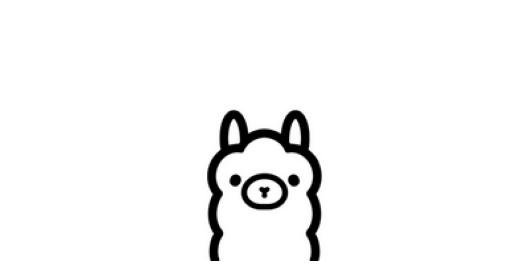

In [8]:
visualize_image('/content/ollama-llama-logo.png')

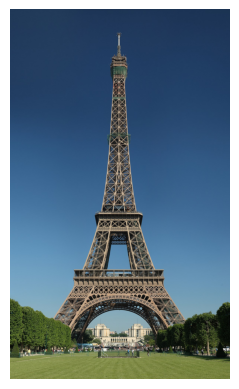

In [9]:
visualize_image('/content/eiffel-tower.png')

## Using Ollama's Llava 7:b Model To Process Our Questions About a Given Image

Below is a method that utilizes Ollama's Llava 7:b model to answer questions about a given image, along with example usages.

In [10]:
def interpret_image(image_path, question):
    try:
        with open(image_path, "rb") as f:
            response = ollama.chat(
                model="llava",
                messages=[
                    {
                        "role": "user",
                        "content": question,
                        "images": [f.read()],
                    }
                ],
            )
        return response.get("message", {}).get("content", "No content received.")
    except Exception as e:
        return f"Error processing the image: {e}"


In [12]:
display(Markdown(interpret_image('/content/ollama-llama-logo.png', "What's in this image?")))

 The image shows a cartoon of an animated llama, which appears to be looking out from under a bed. The llama is standing with its head peeking out, and it has a simple, cute design with limited facial features like eyes and a nose. In the background, there seems to be a blanket or carpet on the floor, indicating that the setting might be a bedroom or a similar indoor space. 

In [13]:
display(Markdown(interpret_image('/content/eiffel-tower.png', "Identify this monumental structure and its location.")))

 The image shows the Eiffel Tower, which is located in Paris, France. It is a world-renowned landmark and an iconic symbol of the city. 